# Connected components

This notebook illustrates the search for [connected components](https://en.wikipedia.org/wiki/Component_(graph_theory)) in graphs.

In [2]:
from IPython.display import SVG

In [3]:
import numpy as np

In [4]:
from sknetwork.data import karate_club, painters, movie_actor
from sknetwork.topology import get_connected_components, get_largest_connected_component
from sknetwork.visualization import visualize_graph, visualize_bigraph
from sknetwork.utils.format import bipartite2undirected

## Graphs

In [5]:
graph = karate_club(metadata=True)
adjacency = graph.adjacency
position = graph.position

In [6]:
# subgraph
k = 15
adjacency = adjacency[:k][:,:k]
position = position[:k]

In [7]:
# connected components
labels = get_connected_components(adjacency)

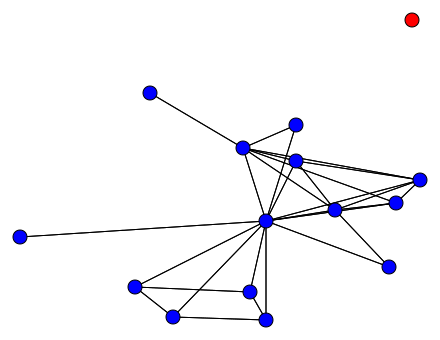

In [8]:
image = visualize_graph(adjacency, position, labels=labels)
SVG(image)

In [9]:
# largest connected component
new_adjacency, index = get_largest_connected_component(adjacency, return_index=True)

In [13]:
len(index)

14

## Directed graphs

In [34]:
graph = painters(metadata=True)
adjacency = graph.adjacency
names = graph.names
position = graph.position

In [35]:
# weak connected components
labels = get_connected_components(adjacency)

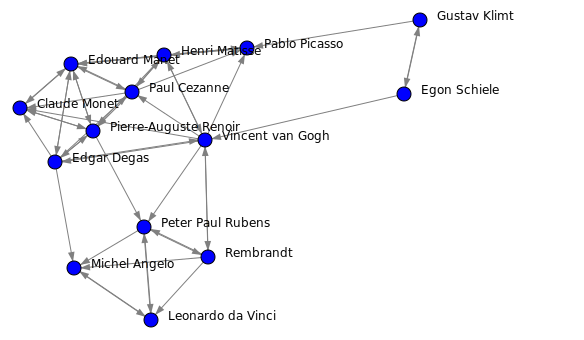

In [36]:
image = visualize_graph(adjacency, position=position, names=names, labels=labels)
SVG(image)

In [37]:
# strong connected components
labels = get_connected_components(adjacency, connection='strong')

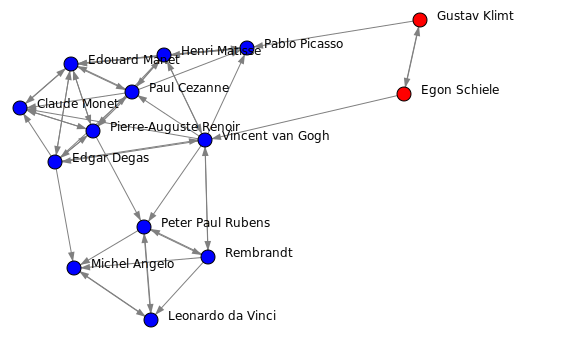

In [38]:
image = visualize_graph(adjacency, position, names, labels)
SVG(image)

In [39]:
# largest connected component
new_adjacency, index = get_largest_connected_component(adjacency, connection='strong', return_index=True)

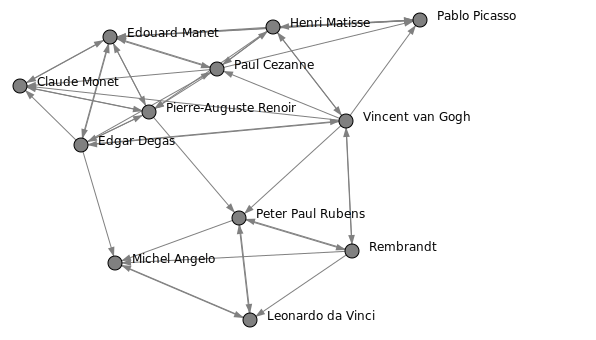

In [40]:
image = visualize_graph(new_adjacency, position[index], names[index])
SVG(image)

## Bipartite graphs

In [21]:
graph = movie_actor(metadata=True)
biadjacency = graph.biadjacency
names_row = graph.names_row
names_col = graph.names_col

In [22]:
# subgraph
k = 5
biadjacency = biadjacency[k:]
names_row = names_row[k:]

In [26]:
labels = get_connected_components(biadjacency, force_bipartite=True)

In [27]:
n_row, _ = biadjacency.shape
labels_row = labels[:n_row]
labels_col = labels[n_row:]

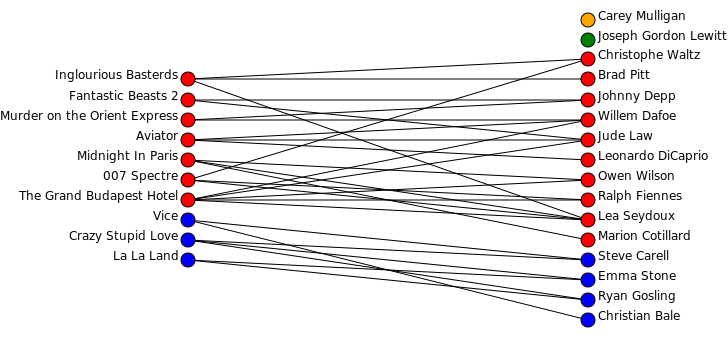

In [28]:
image = visualize_bigraph(biadjacency, names_row, names_col, labels_row, labels_col)
SVG(image)

In [29]:
# largest connected component
new_biadjacency, index = get_largest_connected_component(biadjacency, force_bipartite=True, return_index=True)

In [30]:
n_row, n_col = new_biadjacency.shape
index_row = index[:n_row]
index_col = index[n_row:]

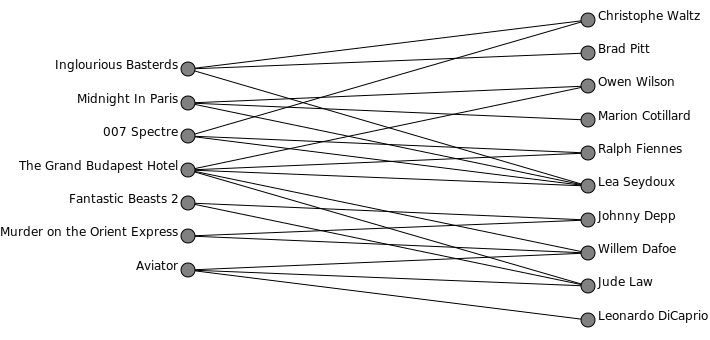

In [32]:
image = visualize_bigraph(new_biadjacency, names_row[index_row], names_col[index_col])
SVG(image)